# Backtest Module Walkthrough

In [1]:
!git clone https://github.com/fr32code/backtest_skeleton.git --quiet
!pip install git+https://github.com/quantopian/pyfolio --quiet
from backtest_skeleton.backtest_module import *

fatal: destination path 'backtest_skeleton' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [2]:
# 종가(수정종가) 데이터
prices = pd.read_csv('https://raw.githubusercontent.com/fr32code/backtest_skeleton/main/Adj.%20Close_data.csv')
prices.index = pd.to_datetime(prices['Date'])
prices = prices.drop(columns=['Date'])

# 시가총액 데이터
df1 = pd.read_csv('https://raw.githubusercontent.com/fr32code/backtest_skeleton/main/Market-Cap_data.csv')
df1.index = pd.to_datetime(df1['Date'])
df1 = df1.drop(columns=['Date'])

# PER 데이터
df2 = pd.read_csv('https://raw.githubusercontent.com/fr32code/backtest_skeleton/main/PDIVE_data.csv')
df2.index = pd.to_datetime(df2['Date'])
df2 = df2.drop(columns=['Date'])

# PBR 데이터
df3 = pd.read_csv('https://raw.githubusercontent.com/fr32code/backtest_skeleton/main/Price%20to%20Book%20Value_data.csv')
df3.index = pd.to_datetime(df3['Date'])
df3 = df3.drop(columns=['Date'])

print(prices.head(), '\n', df1.head(), '\n', df2.head(), '\n', df3.head())

                A    AAP   AAPL    ABC  ...    XRX    XYL    ZBH   ZEUS
Date                                    ...                            
2013-10-01  34.90  81.40  15.38  54.98  ...  22.57  25.42  77.45  27.44
2013-10-02  34.68  80.56  15.43  54.74  ...  22.61  25.31  78.02  27.11
2013-10-03  34.34  79.86  15.24  54.05  ...  22.37  25.11  77.68  26.77
2013-10-04  34.82  81.09  15.23  54.98  ...  22.65  25.36  78.37  27.08
2013-10-07  34.39  79.94  15.38  54.54  ...  22.37  25.20  78.20  26.78

[5 rows x 446 columns] 
                        A           AAP  ...           ZBH         ZEUS
Date                                    ...                           
2013-10-01  1.812608e+10  6.141394e+09  ...  1.416628e+10  314832160.0
2013-10-02  1.801082e+10  6.078126e+09  ...  1.427114e+10  311073630.0
2013-10-03  1.783270e+10  6.025158e+09  ...  1.420925e+10  307204555.0
2013-10-04  1.808416e+10  6.117853e+09  ...  1.433474e+10  310741995.0
2013-10-07  1.785715e+10  6.031043e+09  ... 

## (1) Size Factor 인스턴스

In [3]:
sizeFactor = Factor(df1, ascending_bool_list=[True], prices=prices)

In [4]:
print(sizeFactor.df_list)

(                       A           AAP  ...           ZBH         ZEUS
Date                                    ...                           
2013-10-01  1.812608e+10  6.141394e+09  ...  1.416628e+10  314832160.0
2013-10-02  1.801082e+10  6.078126e+09  ...  1.427114e+10  311073630.0
2013-10-03  1.783270e+10  6.025158e+09  ...  1.420925e+10  307204555.0
2013-10-04  1.808416e+10  6.117853e+09  ...  1.433474e+10  310741995.0
2013-10-07  1.785715e+10  6.031043e+09  ...  1.430380e+10  307315100.0
...                  ...           ...  ...           ...          ...
2020-09-08  2.973125e+10  1.058677e+10  ...  2.862742e+10  130863015.0
2020-09-09  3.060313e+10  1.076958e+10  ...  2.902490e+10  126834690.0
2020-09-10  3.080312e+10  1.071446e+10  ...  2.870816e+10  127064880.0
2020-09-11  3.081250e+10  1.078632e+10  ...  2.881995e+10  126719595.0
2020-09-14  3.106875e+10  1.097611e+10  ...  2.910564e+10  129021495.0

[1751 rows x 446 columns],)


In [5]:
print(sizeFactor.ranks)

                A    AAP   AAPL    ABC    ABT  ...   XRAY    XRX    XYL    ZBH  ZEUS
Date                                           ...                                  
2013-10-01  326.0  218.0  446.0  306.0  404.0  ...  223.0  294.0  193.0  303.0  14.0
2013-10-02  326.0  217.0  446.0  307.0  404.0  ...  226.0  297.0  193.0  303.0  15.0
2013-10-03  326.0  216.0  446.0  306.0  403.0  ...  225.0  295.0  193.0  303.0  14.0
2013-10-04  327.0  217.0  446.0  307.0  405.0  ...  226.0  297.0  192.0  303.0  15.0
2013-10-07  326.0  217.0  446.0  308.0  405.0  ...  226.0  297.0  192.0  303.0  15.0
...           ...    ...    ...    ...    ...  ...    ...    ...    ...    ...   ...
2020-09-08  351.0  250.0  446.0  307.0  432.0  ...  239.0  159.0  285.0  348.0   7.0
2020-09-09  353.0  249.0  446.0  308.0  432.0  ...  239.0  160.0  288.0  349.0   7.0
2020-09-10  355.0  249.0  446.0  308.0  432.0  ...  240.0  159.0  287.0  349.0   7.0
2020-09-11  355.0  249.0  446.0  308.0  431.0  ...  240.0  161.0 

In [6]:
print(sizeFactor.factor_signal)

              A  AAP  AAPL  ABC  ABT  ACHC  ...  XOM  XRAY  XRX  XYL  ZBH  ZEUS
Date                                        ...                                
2013-10-01  0.0  0.0   1.0  0.0  1.0   0.0  ...  1.0   0.0  0.0  0.0  0.0  -1.0
2013-10-02  0.0  0.0   1.0  0.0  1.0   0.0  ...  1.0   0.0  0.0  0.0  0.0  -1.0
2013-10-03  0.0  0.0   1.0  0.0  1.0   0.0  ...  1.0   0.0  0.0  0.0  0.0  -1.0
2013-10-04  0.0  0.0   1.0  0.0  1.0   0.0  ...  1.0   0.0  0.0  0.0  0.0  -1.0
2013-10-07  0.0  0.0   1.0  0.0  1.0   0.0  ...  1.0   0.0  0.0  0.0  0.0  -1.0
...         ...  ...   ...  ...  ...   ...  ...  ...   ...  ...  ...  ...   ...
2020-09-08  0.0  0.0   1.0  0.0  1.0   0.0  ...  1.0   0.0  0.0  0.0  0.0  -1.0
2020-09-09  0.0  0.0   1.0  0.0  1.0   0.0  ...  1.0   0.0  0.0  0.0  0.0  -1.0
2020-09-10  0.0  0.0   1.0  0.0  1.0   0.0  ...  1.0   0.0  0.0  0.0  0.0  -1.0
2020-09-11  0.0  0.0   1.0  0.0  1.0   0.0  ...  1.0   0.0  0.0  0.0  0.0  -1.0
2020-09-14  0.0  0.0   1.0  0.0  1.0   0

In [7]:
print(sizeFactor.cs_assets_weights.iloc[250:, :])

              A  AAP      AAPL  ABC       ABT  ...  XRAY  XRX  XYL  ZBH      ZEUS
Date                                           ...                               
2014-09-29  0.0  0.0  0.000000  0.0  0.000000  ...   0.0  0.0  0.0  0.0  0.000000
2014-09-30  0.0  0.0  0.006202  0.0  0.017938  ...   0.0  0.0  0.0  0.0  0.008640
2014-10-01  0.0  0.0  0.006170  0.0  0.017869  ...   0.0  0.0  0.0  0.0  0.008679
2014-10-02  0.0  0.0  0.006096  0.0  0.017692  ...   0.0  0.0  0.0  0.0  0.008666
2014-10-03  0.0  0.0  0.006050  0.0  0.017687  ...   0.0  0.0  0.0  0.0  0.008703
...         ...  ...       ...  ...       ...  ...   ...  ...  ...  ...       ...
2020-09-08  0.0  0.0  0.000995  0.0  0.004269  ...   0.0  0.0  0.0  0.0  0.005053
2020-09-09  0.0  0.0  0.000979  0.0  0.004149  ...   0.0  0.0  0.0  0.0  0.004971
2020-09-10  0.0  0.0  0.000984  0.0  0.004099  ...   0.0  0.0  0.0  0.0  0.005019
2020-09-11  0.0  0.0  0.000971  0.0  0.003973  ...   0.0  0.0  0.0  0.0  0.005078
2020-09-14  0.0 

In [8]:
print(sizeFactor.factor_weighted_signal.iloc[250:, :])

              A  AAP      AAPL  ABC       ABT  ...  XRAY  XRX  XYL  ZBH      ZEUS
Date                                           ...                               
2014-09-29  0.0  0.0  0.000000  0.0  0.000000  ...   0.0  0.0  0.0  0.0 -0.000000
2014-09-30  0.0  0.0  0.006202  0.0  0.017938  ...   0.0  0.0  0.0  0.0 -0.008640
2014-10-01  0.0  0.0  0.006170  0.0  0.017869  ...   0.0  0.0  0.0  0.0 -0.008679
2014-10-02  0.0  0.0  0.006096  0.0  0.017692  ...   0.0  0.0  0.0  0.0 -0.008666
2014-10-03  0.0  0.0  0.006050  0.0  0.017687  ...   0.0  0.0  0.0  0.0 -0.008703
...         ...  ...       ...  ...       ...  ...   ...  ...  ...  ...       ...
2020-09-08  0.0  0.0  0.000995  0.0  0.004269  ...   0.0  0.0  0.0  0.0 -0.005053
2020-09-09  0.0  0.0  0.000979  0.0  0.004149  ...   0.0  0.0  0.0  0.0 -0.004971
2020-09-10  0.0  0.0  0.000984  0.0  0.004099  ...   0.0  0.0  0.0  0.0 -0.005019
2020-09-11  0.0  0.0  0.000971  0.0  0.003973  ...   0.0  0.0  0.0  0.0 -0.005078
2020-09-14  0.0 

In [9]:
print(sizeFactor.factor_weighted_signal == sizeFactor.factor_signal * sizeFactor.cs_assets_weights)

               A   AAP  AAPL   ABC   ABT  ...  XRAY   XRX   XYL   ZBH  ZEUS
Date                                      ...                              
2013-10-01  True  True  True  True  True  ...  True  True  True  True  True
2013-10-02  True  True  True  True  True  ...  True  True  True  True  True
2013-10-03  True  True  True  True  True  ...  True  True  True  True  True
2013-10-04  True  True  True  True  True  ...  True  True  True  True  True
2013-10-07  True  True  True  True  True  ...  True  True  True  True  True
...          ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
2020-09-08  True  True  True  True  True  ...  True  True  True  True  True
2020-09-09  True  True  True  True  True  ...  True  True  True  True  True
2020-09-10  True  True  True  True  True  ...  True  True  True  True  True
2020-09-11  True  True  True  True  True  ...  True  True  True  True  True
2020-09-14  True  True  True  True  True  ...  True  True  True  True  True

[1751 rows 

## (2) Value Factor 인스턴스

In [10]:
# 이 경우 데이터 특성을 고려해 df2, df3의 음수 값 점수 부여 용이하게끔 수정
df_list = [df2, df3]
for i in range(len(df_list)):
    B1 = df_list[i][df_list[i].columns.tolist()]
    B1[B1 >= 0] = 1
    B1[B1 < 0] = 0
    
    B2 = df_list[i][df_list[i].columns.tolist()]
    B2[B2 >= 0] = 0
    B2[B2 < 0] = 1
    
    max_df = B2.mul(df_list[i].max(axis=1).values, axis=0)
    
    df_list[i] = B1 * df_list[i] + max_df + abs(B2 * df_list[i])

print(df_list[0], '\n', df_list[1])

                    A        AAP       AAPL  ...        XYL         ZBH         ZEUS
Date                                         ...                                    
2013-10-01  19.324174  15.069205  12.276597  ...  22.574517   20.897299  7375.006724
2013-10-02  19.201303  14.913964  12.311814  ...  22.478591   21.051981  7373.395278
2013-10-03  19.011413  14.783994  12.156860  ...  22.302727   20.960693  7342.294463
2013-10-04  19.279494  15.011440  12.149816  ...  22.526554   21.145805  7393.295242
2013-10-07  19.037476  14.798435  12.269554  ...  22.382665   21.100161  7340.559133
...               ...        ...        ...  ...        ...         ...          ...
2020-09-08  43.026411  23.363960  34.246225  ...  58.462242  780.038589  3888.175092
2020-09-09  44.288169  23.767398  35.612188  ...  59.942663  790.869324  3959.677618
2020-09-10  44.577605  23.645751  34.449602  ...  58.943738  782.238582  3813.215477
2020-09-11  44.591172  23.804354  33.997316  ...  60.761925  785.

In [11]:
print(df_list[0] < 0, '\n', df_list[1] < 0)

                A    AAP   AAPL    ABC  ...    XRX    XYL    ZBH   ZEUS
Date                                    ...                            
2013-10-01  False  False  False  False  ...  False  False  False  False
2013-10-02  False  False  False  False  ...  False  False  False  False
2013-10-03  False  False  False  False  ...  False  False  False  False
2013-10-04  False  False  False  False  ...  False  False  False  False
2013-10-07  False  False  False  False  ...  False  False  False  False
...           ...    ...    ...    ...  ...    ...    ...    ...    ...
2020-09-08  False  False  False  False  ...  False  False  False  False
2020-09-09  False  False  False  False  ...  False  False  False  False
2020-09-10  False  False  False  False  ...  False  False  False  False
2020-09-11  False  False  False  False  ...  False  False  False  False
2020-09-14  False  False  False  False  ...  False  False  False  False

[1751 rows x 446 columns] 
                 A    AAP   AAPL    

In [12]:
valueFactor = Factor(df_list[0], df_list[1], ascending_bool_list=[False, False], prices=prices)

In [13]:
print(valueFactor.df_list)

(                    A        AAP       AAPL  ...        XYL         ZBH         ZEUS
Date                                         ...                                    
2013-10-01  19.324174  15.069205  12.276597  ...  22.574517   20.897299  7375.006724
2013-10-02  19.201303  14.913964  12.311814  ...  22.478591   21.051981  7373.395278
2013-10-03  19.011413  14.783994  12.156860  ...  22.302727   20.960693  7342.294463
2013-10-04  19.279494  15.011440  12.149816  ...  22.526554   21.145805  7393.295242
2013-10-07  19.037476  14.798435  12.269554  ...  22.382665   21.100161  7340.559133
...               ...        ...        ...  ...        ...         ...          ...
2020-09-08  43.026411  23.363960  34.246225  ...  58.462242  780.038589  3888.175092
2020-09-09  44.288169  23.767398  35.612188  ...  59.942663  790.869324  3959.677618
2020-09-10  44.577605  23.645751  34.449602  ...  58.943738  782.238582  3813.215477
2020-09-11  44.591172  23.804354  33.997316  ...  60.761925  785

In [14]:
print(valueFactor.calc_ranks([False, False]))

                A    AAP   AAPL    ABC  ...    XRX    XYL    ZBH   ZEUS
Date                                    ...                            
2013-10-01  393.0  476.0  557.0  144.0  ...  842.0  443.0  494.0  433.0
2013-10-02  395.0  481.0  554.0  144.0  ...  843.0  443.0  483.0  435.0
2013-10-03  395.0  480.0  557.0  145.0  ...  840.0  441.0  483.0  437.0
2013-10-04  386.0  474.0  557.0  143.0  ...  841.0  441.0  481.0  436.0
2013-10-07  390.0  477.0  551.0  141.0  ...  842.0  435.0  475.0  435.0
...           ...    ...    ...    ...  ...    ...    ...    ...    ...
2020-09-08  281.0  497.0  231.0  551.0  ...  854.0  283.0  342.0  474.0
2020-09-09  280.0  498.0  228.0  553.0  ...  853.0  280.0  343.0  475.0
2020-09-10  278.0  496.0  231.0  556.0  ...  854.0  282.0  342.0  474.0
2020-09-11  277.0  494.0  235.0  558.0  ...  850.0  274.0  341.0  474.0
2020-09-14  280.0  486.0  230.0  556.0  ...  854.0  278.0  342.0  473.0

[1751 rows x 446 columns]


In [15]:
print(valueFactor.factor_signal)

              A  AAP  AAPL  ABC  ABT  ACHC  ...  XOM  XRAY  XRX  XYL  ZBH  ZEUS
Date                                        ...                                
2013-10-01  0.0  0.0   0.0 -1.0  0.0  -1.0  ...  0.0   0.0  1.0  0.0  0.0   0.0
2013-10-02  0.0  0.0   0.0 -1.0  0.0  -1.0  ...  0.0   0.0  1.0  0.0  0.0   0.0
2013-10-03  0.0  0.0   0.0 -1.0  0.0  -1.0  ...  0.0   0.0  1.0  0.0  0.0   0.0
2013-10-04  0.0  0.0   0.0 -1.0  0.0  -1.0  ...  0.0   0.0  1.0  0.0  0.0   0.0
2013-10-07  0.0  0.0   0.0 -1.0  0.0  -1.0  ...  0.0   0.0  1.0  0.0  0.0   0.0
...         ...  ...   ...  ...  ...   ...  ...  ...   ...  ...  ...  ...   ...
2020-09-08  0.0  0.0  -1.0  0.0  0.0   0.0  ...  0.0   0.0  1.0  0.0  0.0   0.0
2020-09-09  0.0  0.0  -1.0  0.0  0.0   0.0  ...  1.0   0.0  1.0  0.0  0.0   0.0
2020-09-10  0.0  0.0  -1.0  0.0  0.0   0.0  ...  1.0   0.0  1.0  0.0  0.0   0.0
2020-09-11  0.0  0.0  -1.0  0.0  0.0   0.0  ...  1.0   0.0  1.0  0.0  0.0   0.0
2020-09-14  0.0  0.0  -1.0  0.0  0.0   0

In [16]:
print(valueFactor.cs_assets_weights.iloc[250:, :], '\n', valueFactor.factor_weighted_signal.iloc[250:, :])

              A  AAP      AAPL       ABC  ABT  ...  XRAY       XRX  XYL  ZBH  ZEUS
Date                                           ...                                
2014-09-29  0.0  0.0  0.000000  0.000000  0.0  ...   0.0  0.000000  0.0  0.0   0.0
2014-09-30  0.0  0.0  0.000000  0.006194  0.0  ...   0.0  0.005686  0.0  0.0   0.0
2014-10-01  0.0  0.0  0.000000  0.006247  0.0  ...   0.0  0.005714  0.0  0.0   0.0
2014-10-02  0.0  0.0  0.000000  0.006229  0.0  ...   0.0  0.005684  0.0  0.0   0.0
2014-10-03  0.0  0.0  0.000000  0.006180  0.0  ...   0.0  0.005631  0.0  0.0   0.0
...         ...  ...       ...       ...  ...  ...   ...       ...  ...  ...   ...
2020-09-08  0.0  0.0  0.001029  0.000000  0.0  ...   0.0  0.003675  0.0  0.0   0.0
2020-09-09  0.0  0.0  0.001019  0.000000  0.0  ...   0.0  0.003643  0.0  0.0   0.0
2020-09-10  0.0  0.0  0.000996  0.000000  0.0  ...   0.0  0.003558  0.0  0.0   0.0
2020-09-11  0.0  0.0  0.000987  0.000000  0.0  ...   0.0  0.003524  0.0  0.0   0.0
2020

In [17]:
print(valueFactor.factor_signal * valueFactor.cs_assets_weights == valueFactor.factor_weighted_signal)

               A   AAP  AAPL   ABC   ABT  ...  XRAY   XRX   XYL   ZBH  ZEUS
Date                                      ...                              
2013-10-01  True  True  True  True  True  ...  True  True  True  True  True
2013-10-02  True  True  True  True  True  ...  True  True  True  True  True
2013-10-03  True  True  True  True  True  ...  True  True  True  True  True
2013-10-04  True  True  True  True  True  ...  True  True  True  True  True
2013-10-07  True  True  True  True  True  ...  True  True  True  True  True
...          ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
2020-09-08  True  True  True  True  True  ...  True  True  True  True  True
2020-09-09  True  True  True  True  True  ...  True  True  True  True  True
2020-09-10  True  True  True  True  True  ...  True  True  True  True  True
2020-09-11  True  True  True  True  True  ...  True  True  True  True  True
2020-09-14  True  True  True  True  True  ...  True  True  True  True  True

[1751 rows 

## Backtest 클래스 내부

Start date,2013-10-01
End date,2020-09-14
Total months,83
,Backtest
Annual return,23.671%
Cumulative returns,337.627%
Annual volatility,5.303%
Sharpe ratio,4.03
Calmar ratio,0.57
Stability,0.82
Max drawdown,-41.605%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,41.60,2017-02-15,2018-03-12,2019-05-14,585
1,22.21,2015-10-20,2016-06-29,2016-10-12,257
2,7.16,2015-01-09,2015-02-25,2015-03-18,49
3,2.95,2015-05-07,2015-05-29,2015-06-11,26
4,2.19,2019-10-01,2020-09-14,NaT,NaN


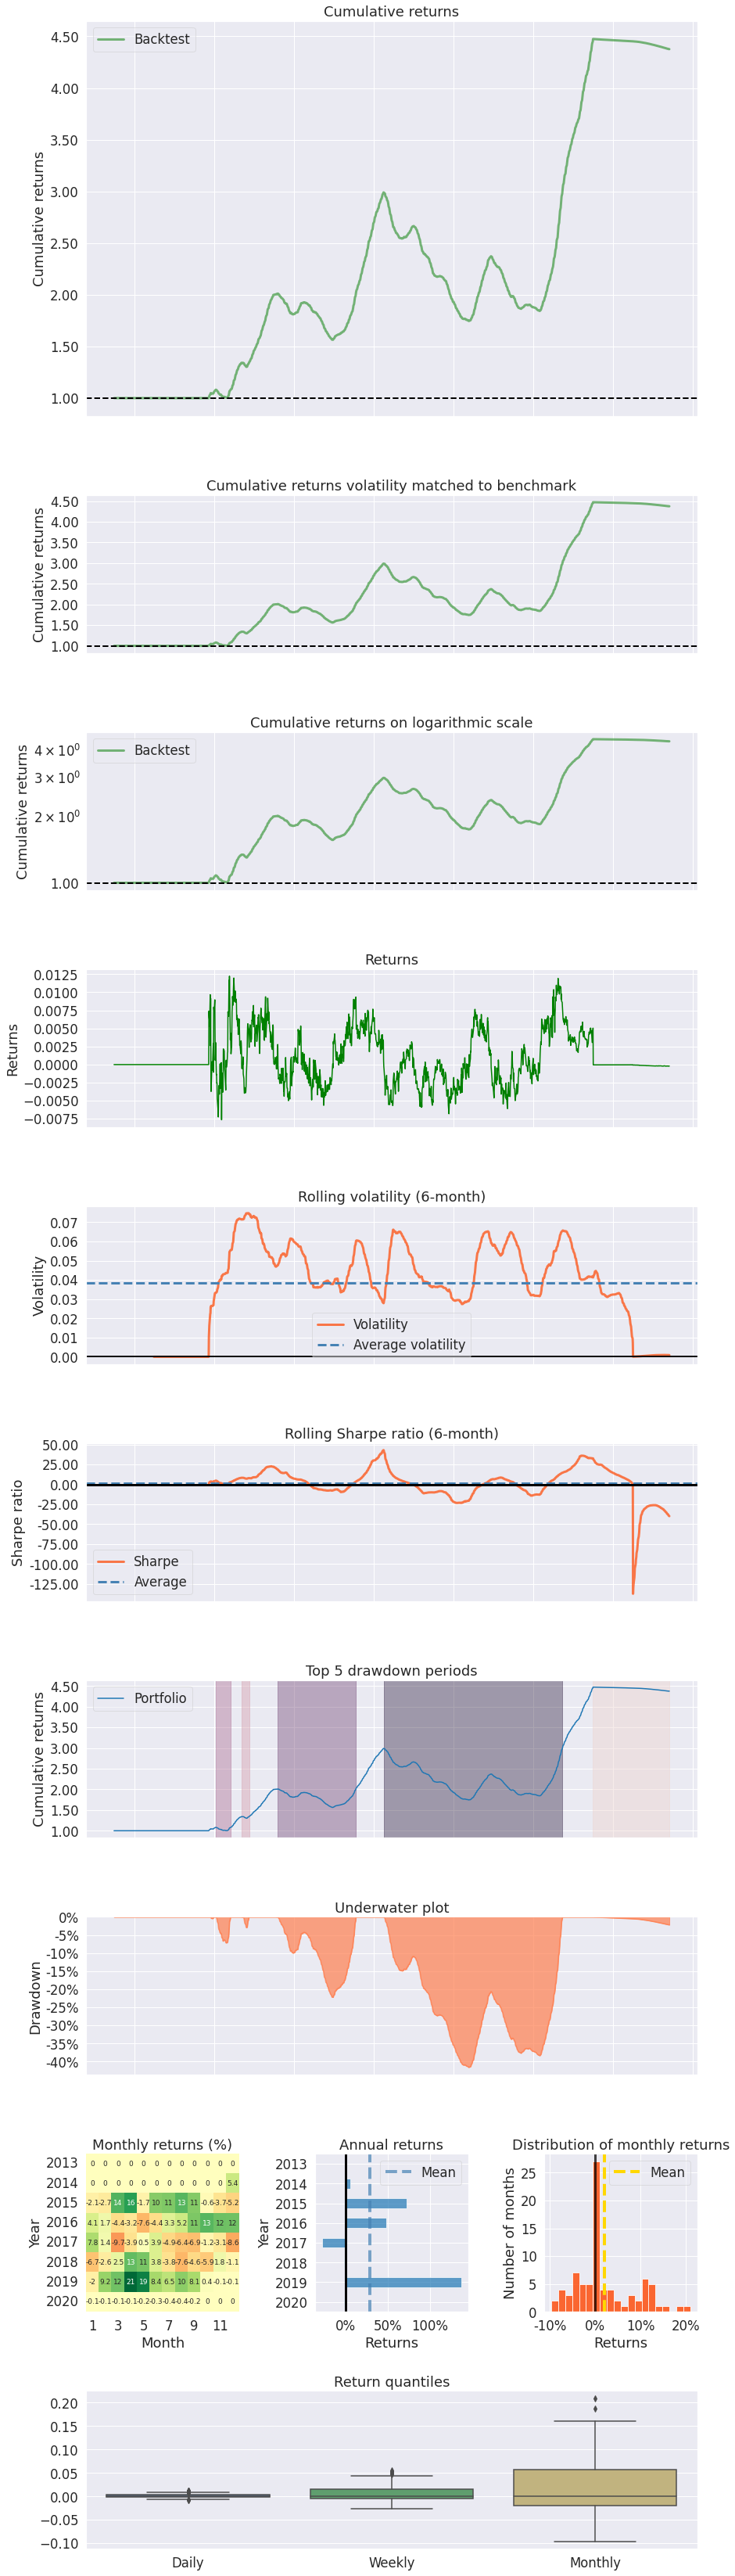

In [18]:
backtest = MultiFactorBacktest(sizeFactor, valueFactor, multi=True, prices=prices)

In [19]:
print(backtest.holding_returns)

                   A       AAP      AAPL  ...       XYL       ZBH      ZEUS
Date                                      ...                              
2013-10-01  0.121069  0.604494  0.488547  ...  0.332169  0.273307 -0.196149
2013-10-02  0.127911  0.638634  0.472049  ...  0.350220  0.269366 -0.189647
2013-10-03  0.158328  0.640877  0.500937  ...  0.357016  0.263092 -0.178943
2013-10-04  0.132841  0.606940  0.505207  ...  0.356621  0.255390 -0.188746
2013-10-07  0.144136  0.607333  0.478144  ...  0.365254  0.254928 -0.196055
...              ...       ...       ...  ...       ...       ...       ...
2020-09-08 -0.003000 -0.003000 -0.003000  ... -0.003000 -0.003000 -0.003000
2020-09-09 -0.003000 -0.003000 -0.003000  ... -0.003000 -0.003000 -0.003000
2020-09-10 -0.003000 -0.003000 -0.003000  ... -0.003000 -0.003000 -0.003000
2020-09-11 -0.003000 -0.003000 -0.003000  ... -0.003000 -0.003000 -0.003000
2020-09-14 -0.003000 -0.003000 -0.003000  ... -0.003000 -0.003000 -0.003000

[1751 rows 

In [20]:
print(backtest.rebalance_weight)

0.004166666666666667


In [21]:
print(backtest.factors)

(<backtest_skeleton.backtest_module.Factor object at 0x7f5ad75a2e10>, <backtest_skeleton.backtest_module.Factor object at 0x7f5ad72d87d0>)


In [22]:
print(backtest.factors_cs_weights_calc().iloc[250:, :])

              A  AAP      AAPL       ABC  ...       XRX  XYL  ZBH      ZEUS
Date                                      ...                              
2014-09-29  0.0  0.0  0.000000  0.000000  ...  0.000000  0.0  0.0  0.000000
2014-09-30  0.0  0.0  0.004484 -0.001715  ...  0.001575  0.0  0.0 -0.006247
2014-10-01  0.0  0.0  0.004779 -0.001408  ...  0.001288  0.0  0.0 -0.006723
2014-10-02  0.0  0.0  0.004954 -0.001167  ...  0.001065  0.0  0.0 -0.007043
2014-10-03  0.0  0.0  0.004971 -0.001103  ...  0.001005  0.0  0.0 -0.007150
...         ...  ...       ...       ...  ...       ...  ...  ...       ...
2020-09-08  0.0  0.0  0.000013  0.000000  ...  0.001782  0.0  0.0 -0.002603
2020-09-09  0.0  0.0  0.000007  0.000000  ...  0.001771  0.0  0.0 -0.002554
2020-09-10  0.0  0.0  0.000020  0.000000  ...  0.001733  0.0  0.0 -0.002575
2020-09-11  0.0  0.0  0.000017  0.000000  ...  0.001717  0.0  0.0 -0.002604
2020-09-14  0.0  0.0  0.000010  0.000000  ...  0.001708  0.0  0.0 -0.002641

[1501 rows 

In [23]:
print(backtest.port_returns_bf_ts.iloc[250:-240])

Date
2014-09-29    0.000000
2014-09-30   -0.000124
2014-10-01   -0.000092
2014-10-02   -0.000054
2014-10-03   -0.000071
                ...   
2019-09-25    0.000117
2019-09-26    0.000105
2019-09-27    0.000085
2019-09-30    0.000125
2019-10-01    0.000140
Length: 1261, dtype: float64


In [24]:
print(backtest.port_returns_bf_ts == 
      (backtest.final_signal * backtest.holding_returns * backtest.rebalance_weight).sum(axis=1))

Date
2013-10-01    True
2013-10-02    True
2013-10-03    True
2013-10-04    True
2013-10-07    True
              ... 
2020-09-08    True
2020-09-09    True
2020-09-10    True
2020-09-11    True
2020-09-14    True
Length: 1751, dtype: bool


In [30]:
print(backtest.ts_weights.iloc[:Variables.no_ts_days])

Date
2013-10-01    0.0
2013-10-02    0.0
2013-10-03    0.0
2013-10-04    0.0
2013-10-07    0.0
             ... 
2014-12-02    0.0
2014-12-03    0.0
2014-12-04    0.0
2014-12-05    0.0
2014-12-08    0.0
Length: 300, dtype: float64


In [29]:
print(backtest.portfolio_returns.iloc[Variables.no_ts_days:])

Date
2014-12-09    0.007396
2014-12-10    0.006526
2014-12-11    0.006232
2014-12-12    0.005292
2014-12-15    0.009661
                ...   
2020-09-08   -0.000213
2020-09-09   -0.000210
2020-09-10   -0.000197
2020-09-11   -0.000209
2020-09-14   -0.000208
Length: 1451, dtype: float64


In [31]:
print(backtest.portfolio_returns == backtest.port_returns_bf_ts * backtest.ts_weights)

Date
2013-10-01    True
2013-10-02    True
2013-10-03    True
2013-10-04    True
2013-10-07    True
              ... 
2020-09-08    True
2020-09-09    True
2020-09-10    True
2020-09-11    True
2020-09-14    True
Length: 1751, dtype: bool
